In [4]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pymysql

In [6]:
conn=pymysql.connect(host='localhost',user='root',password='Tarun@93810',database='crime_data')

In [7]:
print('checking the connection')

checking the connection


In [8]:
print(conn)

In [9]:
import pandas as pd

In [10]:
query='SELECT * FROM crime_data;'

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df=pd.read_sql(query,conn)
print(df)

         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

In [14]:
df=pd.read_csv(r"C:\Users\tarunkumarsher\OneDrive\Desktop\crime_data.csv")


In [15]:
print(df)


         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

In [16]:
print(df.shape)

(499, 13)


#### Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.

## Unique value in specific column

In [17]:
df=pd.DataFrame(df)
unique_value=df['Crm_Cd'].unique()
print(unique_value)

[624 745 740 442 946 341 330 930 648 354 230 761 350 310 480 623 440 510
 210 900 888 420 886 421 647 940 662 220 625 755 649 901 320 890 351 956
 820 812 920 850 666 343]


### Determine trends in crime occurence in over time:

In [18]:
df['Date_Rptd']=pd.to_datetime(df['Date_Rptd'])
df['DATE_OCC']=pd.to_datetime(df['DATE_OCC'])
mc=df.resample('M',on='Date_Rptd').size()


## Trend basis on crime occurence in over time

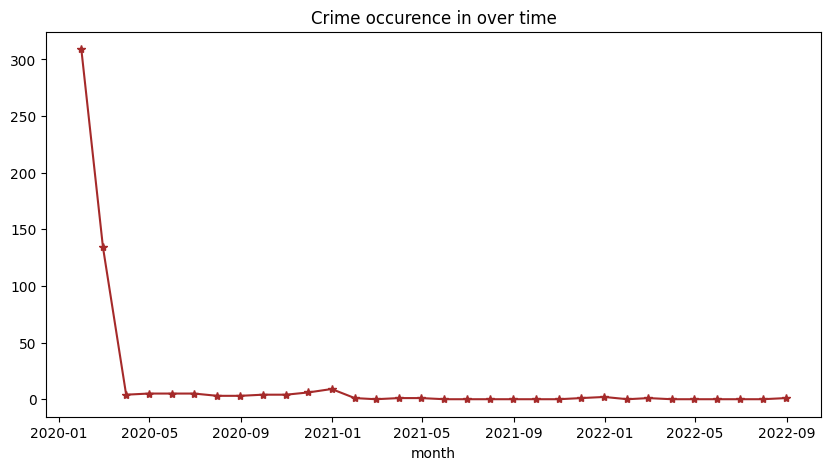

In [21]:

plt.figure(figsize=(10,5))
plt.plot(mc.index,mc.values,marker='*',color='brown')
plt.title('Crime occurence in over time')
plt.xlabel('month')
plt.show()


## Utilize the geographical information  of latitude and longititude

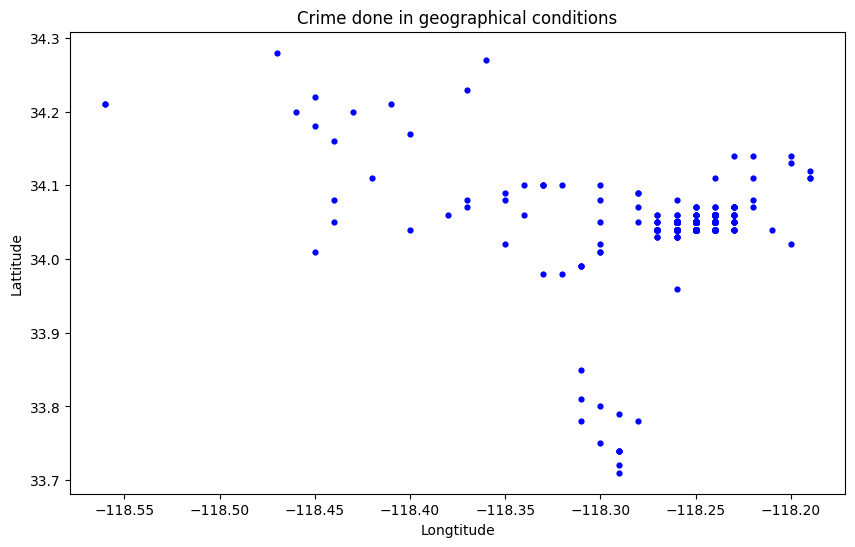

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['LON'],df['LAT'], s=12,color='blue')
plt.xlabel('Longtitude')
plt.ylabel('Lattitude')
plt.title('Crime done in geographical conditions')
plt.show()

## Visualize crime hotspots on a map.

In [80]:
plt.(df[['Location','DATE_OCC','Crm_Cd_Desc']].corr(),annot=True)
plt.show()
             ### failing for heatmap                              

ValueError: could not convert string to float: '1100 W 39TH PL'

## Location Analysis:

In [82]:
location_count=df['Location'].value_counts()
print('Top 10 crime locations:',location_count)

Top 10 crime locations: Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
                      ..
14600 VANOWEN ST       1
600 N ALAMEDA ST       1
FLOWER                 1
400 COLYTON ST         1
2600 S FIGUEROA ST     1
Name: count, Length: 365, dtype: int64


## Crime Code Analysis:

In [87]:
code=df['Crm_Cd']
count_of_codes=code.value_counts()
print(count_of_codes)

Crm_Cd
330    82
624    74
440    44
442    28
510    28
341    26
230    24
740    23
745    23
888    19
310    16
210    12
480    11
354    10
420     9
350     9
930     7
623     5
761     5
662     5
946     4
220     4
648     3
901     3
850     2
956     2
351     2
320     2
625     2
886     2
900     2
755     1
649     1
940     1
647     1
890     1
421     1
820     1
812     1
920     1
666     1
343     1
Name: count, dtype: int64


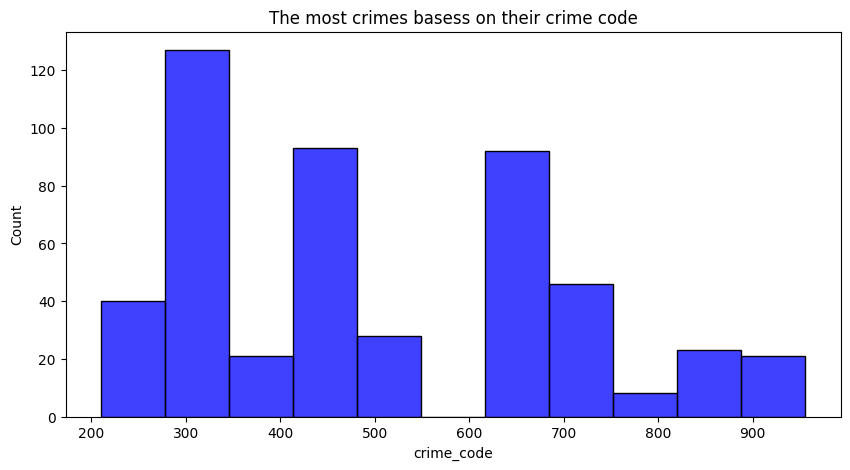

In [91]:
plt.figure(figsize=(10,5))
sns.histplot(df['Crm_Cd'],color='blue',edgecolor='black')
plt.title('The most crimes basess on their crime code')
plt.xlabel('crime_code')
plt.show()
        

- ## Investigate the distribution of victim ages 

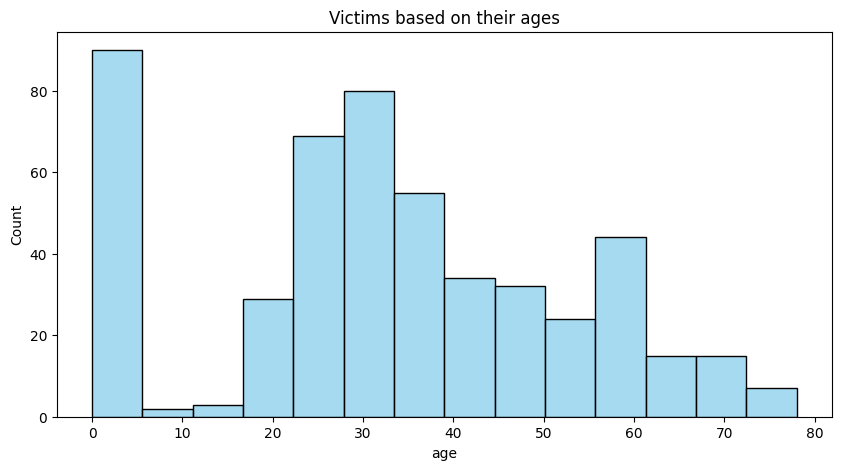

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(df['Vict_Age'],color='skyblue',edgecolor='black')
plt.title('Victims based on their ages')
plt.xlabel('age')

plt.show()

## Distributation of Victim genders

<Axes: xlabel='Vict_Sex', ylabel='count'>

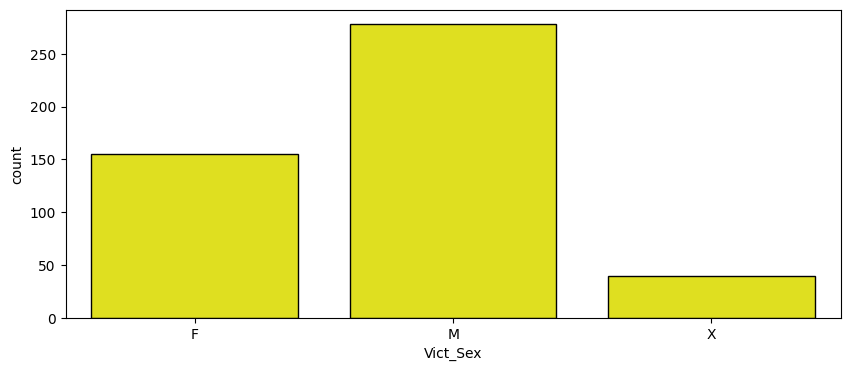

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['Vict_Sex'],edgecolor='black',color='yellow')

## Identify common premises descriptions where crimes occur

In [58]:
pr=df['Premis_Desc']
cop=pr.value_counts()
print(cop)

Premis_Desc
STREET                                          105
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
                                               ... 
MINI-MART                                         1
SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS      1
MEDICAL/DENTAL OFFICES                            1
DETENTION/JAIL FACILITY                           1
MTA PROPERTY OR PARKING LOT                       1
Name: count, Length: 67, dtype: int64


## Examine the states of reported crimes:

In [59]:
crm=df['Status']
status_count=crm.value_counts()
print(status_count)

Status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64


## Generating pie chart

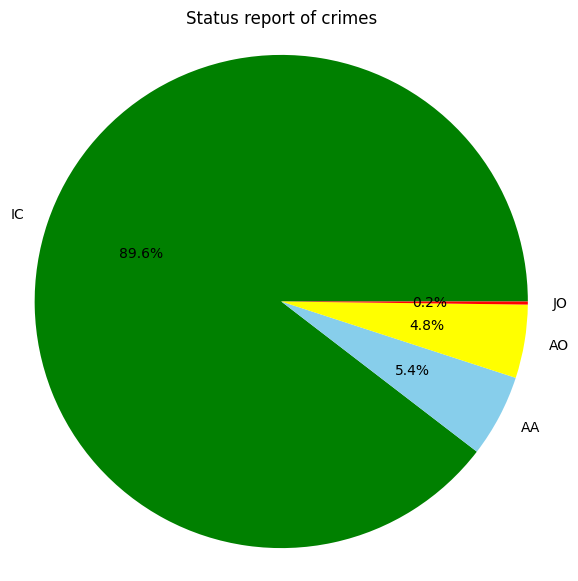

In [107]:
plt.figure(figsize=(7,7))
plt.pie(status_count,labels=status_count.index,autopct='%1.1f%%',colors=['green','skyblue','yellow','red'])
plt.title('Status report of crimes')
plt.axis('equal')
plt.show()

## Questions

### 1.Where are the geographical hotspots for reported crimes?

sol: I am not getting on my heat map


### 2.What is the distribution of victim ages in reported crimes?
sol:
    1. The age group of 24 to 35 the crime frequency is above 60
    2. Some crime frequency is less than 40  and the age group of these crimes are 5 to 15 and 40 to 80
### Is there a significant difference in crime rates between male and female victims?
sol: Yes there is a significant differnce between male and female crime rates
      The male victims are commited to more than female and x victims.
      The male crime rate is above 250
      The female crime rate is above 100
      The x victims crime rate less than 50

### Where do most crimes occur based on the "Location" column?


In [83]:
print('Top 10 crime locations:',location_count)

Top 10 crime locations: Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
                      ..
14600 VANOWEN ST       1
600 N ALAMEDA ST       1
FLOWER                 1
400 COLYTON ST         1
2600 S FIGUEROA ST     1
Name: count, Length: 365, dtype: int64


#### What is the distribution of reported crimes based on Crime Code?
sol: The crime code 330 has most occurence and it's above 82 and another crime code 624 has most occured and count of occurence above 74
